In [67]:
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


In [68]:
url = "https://www.tomato.gg/tank-stats/NA"

response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

script = soup.find("script", {"id": "__NEXT_DATA__"})

if script:
    contents = script.contents[0]
    data = json.loads(contents)
    initial_data = data["props"]["pageProps"]["data"]
    df = pd.DataFrame(initial_data)
    
else:
    with open('backup.txt', 'r') as f:
        text = f.readlines()

        data = []
        for line in text:
            data.append(eval(line))

        df = pd.DataFrame(data)


print(df)

     tank_id         name   nation  tier class  \
0      51361  Progetto 46    Italy     8    MT   
1      50193   Skorpion G  Germany     8    TD   
2      60225   Bourrasque   France     8    MT   
3       5505   UDES 15/16   Sweden    10    MT   
4      45057     SU-130PM     USSR     8    TD   
..       ...          ...      ...   ...   ...   
555    63761       Pz. 58  Germany     8    MT   
556    53793        T95E2      USA     8    MT   
557    13393       Archer       UK     5    TD   
558    52257       M4A2E4      USA     5    MT   
559    54033   Pz. V/IV A  Germany     5    MT   

                                                 image  battles  winrate  \
0    https://api.worldoftanks.com/static/2.66.0/wot...    52480    51.00   
1    https://api.worldoftanks.com/static/2.66.0/wot...    51868    49.11   
2    https://api.worldoftanks.com/static/2.66.0/wot...    51499    53.30   
3    https://api.worldoftanks.com/static/2.66.0/wot...    51164    49.73   
4    https://api.wo

In [69]:
print(df.columns)

df = df.drop('damage_received_from_invisible', axis=1)
df = df.drop('potential_damage_received', axis=1)
df = df.drop('base_defense_points', axis=1)
df = df.drop('base_capture_points', axis=1)
df = df.drop('image', axis=1)
df = df.drop('sniper_damage', axis=1)
df = df.drop('tracking_assist', axis=1)
df = df.drop('shots_fired', axis=1)
df = df.drop('distance_traveled', axis=1)
df = df.drop('difference', axis=1)
df = df.drop('wn8', axis=1)
df = df.drop('tank_id', axis=1)
df = df.drop('survival', axis=1)
df = df.drop('life_time', axis=1)

print(df.columns)


Index(['tank_id', 'name', 'nation', 'tier', 'class', 'image', 'battles',
       'winrate', 'damage', 'sniper_damage', 'frags', 'spotting_assist',
       'tracking_assist', 'shots_fired', 'direct_hits', 'penetrations',
       'hit_rate', 'pen_rate', 'spots', 'damage_blocked', 'damage_received',
       'damage_received_from_invisible', 'potential_damage_received',
       'base_capture_points', 'base_defense_points', 'life_time', 'survival',
       'distance_traveled', 'wn8', 'difference', 'player_winrate', 'isPrem'],
      dtype='object')
Index(['name', 'nation', 'tier', 'class', 'battles', 'winrate', 'damage',
       'frags', 'spotting_assist', 'direct_hits', 'penetrations', 'hit_rate',
       'pen_rate', 'spots', 'damage_blocked', 'damage_received',
       'player_winrate', 'isPrem'],
      dtype='object')


In [70]:
df

,name,nation,tier,class,battles,winrate,damage,frags,spotting_assist,direct_hits,penetrations,hit_rate,pen_rate,spots,damage_blocked,damage_received,player_winrate,isPrem
0,Progetto 46,Italy,8,MT,52480,51.00,1339,0.94,369,7.86,5.94,74.20,75.54,1.24,60,1237,50.55,True
1,Skorpion G,Germany,8,TD,51868,49.11,1261,0.81,165,3.96,2.90,63.31,73.23,0.40,5,928,49.18,True
2,Bourrasque,France,8,MT,51499,53.30,1429,1.01,592,5.76,4.41,74.41,76.67,1.90,3,1079,51.39,True
3,UDES 15/16,Sweden,10,MT,51164,49.73,1880,0.87,528,6.88,4.63,72.81,67.29,1.13,567,1676,49.88,False
4,SU-130PM,USSR,8,TD,50625,49.64,1386,0.90,183,4.15,3.04,64.11,73.23,0.38,1,844,49.81,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,Pz. 58,Germany,8,MT,92,44.47,943,0.70,291,5.11,3.98,63.09,77.87,1.01,78,1173,49.36,True
556,T95E2,USA,8,MT,74,48.73,969,0.62,387,6.45,4.27,66.99,66.25,1.22,344,1296,49.47,True
557,Archer,UK,5,TD,69,52.61,467,0.61,74,4.45,3.55,53.11,79.80,0.32,0,314,52.47,False
558,M4A2E4,USA,5,MT,48,51.15,394,0.48,166,5.44,3.71,65.41,68.20,1.15,184,631,50.19,True


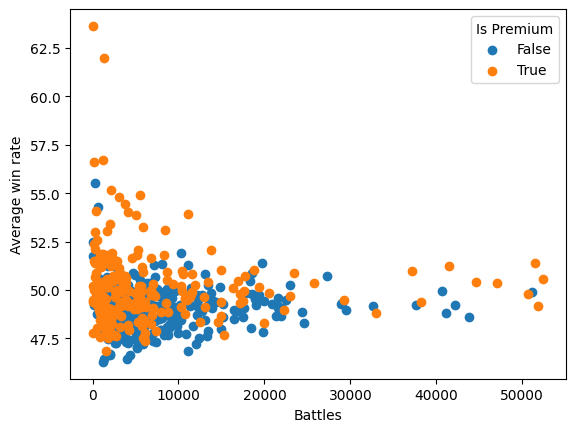

In [71]:
premium = df.groupby('isPrem')

for label, group in premium:
    plt.scatter(group['battles'], group['player_winrate'], label = label)
    

plt.legend(title='Is Premium')
plt.xlabel('Battles')
plt.ylabel('Average win rate') 

plt.show()

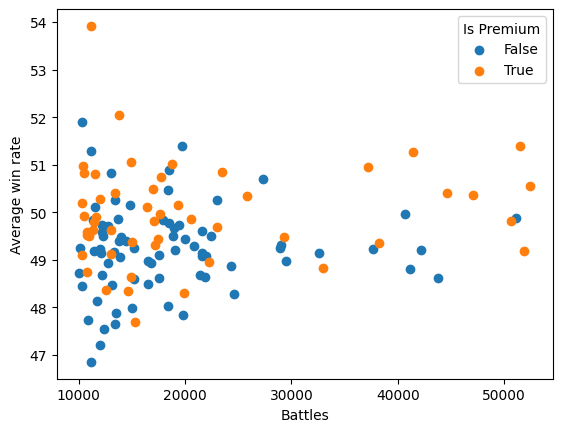

In [72]:
older = df[df['battles'] >= 10000]

premium = older.groupby('isPrem')

for label, group in premium:
    plt.scatter(group['battles'], group['player_winrate'], label = label)
    

plt.legend(title='Is Premium')
plt.xlabel('Battles')
plt.ylabel('Average win rate') 

plt.show()